# MEDICAL MASKS DETECTION PROJECT

## Libraries

In [2]:
# /// Basic libraries
import numpy as np
import pandas as pd
import random

# /// Path files and xml manipulation
from os.path import isfile, join
import xmltodict #library that treats xmls as json files
import os
from os import listdir #os library that lists all the directories

# /// Image processing
import cv2 #opencv
from pathlib import Path

# /// Visualization
import matplotlib.pyplot as plt
import seaborn as sns



In addition, we are going to install torchvision through pytorch. 


This is a utility library that downloads and prepares public datasets.


The torchvision package consists of popular datasets, model architectures, and common image transformations for computer vision.

In [3]:
# /// Torchvision
import torchvision #pytorch library , contains useful attributes and functionalities
import torch #Pytorch
import torchvision.models as models #we will import pretrained model resnet 50
import torchvision.transforms as transforms  #for various transformations for preprocessing
import torchvision.datasets as datasets

## Functions

### File names extraction

In [4]:
def ImageNamesExtraction():
    
    """
    This function give us all the image names of our dataset
    """
    
    img_names = []
    for dirname, _, filenames in os.walk('../ih-final-project/data/medical-masks-dataset/images'):
        for filename in filenames:
            fullpath = os.path.join(dirname, filename)
            extension = fullpath[len(fullpath) - 4:]
            if extension != '.xml':
                img_names.append(filename)
    return img_names


In [5]:
img_names = ImageNamesExtraction() #getting the image names

In [6]:
img_names

['-1x-1.jpg',
 '-I1-MS09uaqsLdGTFkgnS0Rcg1mmPyAj95ySg_eckoM.jpeg',
 '0002526673.jpg',
 '0009S6815V3PEU1N-C123-F4.jpg',
 '000_1OC3DT.jpg',
 '000_1ov3n5_0.jpeg',
 '000b7b75-1600.jpg',
 '001_1024.jpeg',
 '002_1024.jpeg',
 '003_1024.jpeg',
 '004_1024.jpeg',
 '0109-00176-096b1.jpg',
 '012106.jpg_1140x855.jpg',
 '012420_coronoa_masks_web.jpg',
 '0200b38c89b16c37c5de8e247bb00c2f.jpg',
 '0209-00176-076b1.jpg',
 '022814asiatodaymasks_960x540.jpg',
 '025418_springwest005.jpg',
 '0450908675_50159485_mutation-virus-chine-inquietude.jpg',
 '0602623232127-web-tete.jpg',
 '08165739.jpg',
 '08_11_2019-airpollution_234_19737819_192539446.jpg',
 '0_10725.jpg',
 '0_8w7mkX-PHcfMM5s6.jpeg',
 '0_Concern-In-China-As-Mystery-Virus-Spreads.jpg',
 '0ad90195-cd77-489e-bf85-08c83b80d3e0.jpg',
 '1-200102094256105.png',
 '1000x-1.jpg',
 '101d6660a8974050b613dd2e6bd59390.jpg',
 '1024x576_939430607723.jpg',
 '1024x737_09186876046.jpg',
 '1029731146.jpg',
 '1030611863.jpg',
 '1042977068.jpg',
 '10fea_8011463765e2aa28b

### Creation of directories

In [ ]:
def directory_creation(dirname):
    '''
    Function to create directories in our system. The function doesn't create duplicate directories even if we execute
    the function multiple times.
    '''
    try:
        os.mkdir(dirname) #create directory
    except FileExistsError: #Error founded
        print("Directory " + dirname + " already exists.")

### Images and Labels Path extraction

In [28]:
def getting_path(img_name):
    
    """
    This function extract the image and label path to reassign the same name to both files.
    And return the new image and label path of the images.
    
    """
    
    path_master = '../ih-final-project/data/medical-masks-dataset/'
    img_path = path_master + 'images/' + img_name
    
    if img_name[-4:] == 'jpeg':
        lbl_name = img_name[:-5] + '.xml'
    else:
        lbl_name = img_name[:-4] + '.xml'
    
    lbl_path = path_master + 'labels/' + lbl_name
        
    return  img_path, lbl_path

### Parsing images metadata XML

In [8]:
def parse_xml(lbl_path):

    """
    With this function we can obtain the necessary information of each image.
    XML files contain their descriptions like their locations, bounding box and labels good, none or bad.
    
    """
    
    x = xmltodict.parse(open(lbl_path , 'rb'))
    item_list = x['annotation']['object']
    
    # when image has only one bounding box we use isinstance
    if not isinstance(item_list, list):
        item_list = [item_list]
        
    # result contains name(good, bad, none) and its box's coords    
    result = []
    
    for item in item_list:
        name = item['name']
        bndbox = [(int(item['bndbox']['xmin']), int(item['bndbox']['ymin'])),
                  (int(item['bndbox']['xmax']), int(item['bndbox']['ymax']))]       
        result.append((name, bndbox))
    
    # size contains width and height of bounding box
    size = [int(x['annotation']['size']['width']), 
            int(x['annotation']['size']['height'])]
    
    
    
    return result, size  

### Images Visualization

In [9]:
def visualize_image(img_name, bndbox=True):

    """
    This function help us to visualize the images that we want with a common size.
    """
    
    img_path, lbl_path = getting_path(img_name)
    
    #reading the image using opencv's imread function
    image = cv2.imread(img_path)  
    
    #converting image to RGB format as opencv reads image in BGR format. Real colors
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    if bndbox:  #boundbox true
        labels, size = parse_xml(lbl_path)
        thickness = int(sum(size)/400.)
        
        for label in labels:
            name, bndbox = label #label contains image info
            
            if name == 'good':  # draw a green bounding box  
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 255, 0), thickness) #0,255,0 green
            elif name == 'bad': # draw a red bounding box
                cv2.rectangle(image, bndbox[0], bndbox[1], (255, 0, 0), thickness) #255,0,0 red
            else: # the mask does not cover the nose or mouth or both. Draw a blue box
                cv2.rectangle(image, bndbox[0], bndbox[1], (0, 0, 255), thickness) #0,0,255 blue
    
    plt.figure(figsize=(20, 20))
    plt.subplot(1, 2, 1)
    plt.axis('off')
    plt.title(img_name)
    plt.imshow(image)
    plt.show()

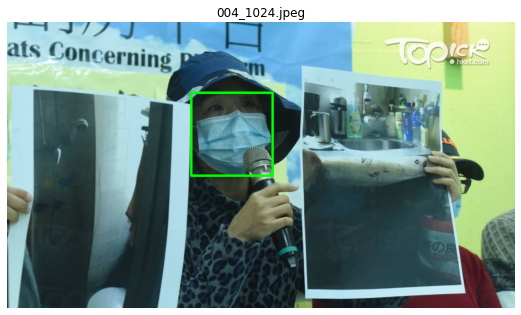

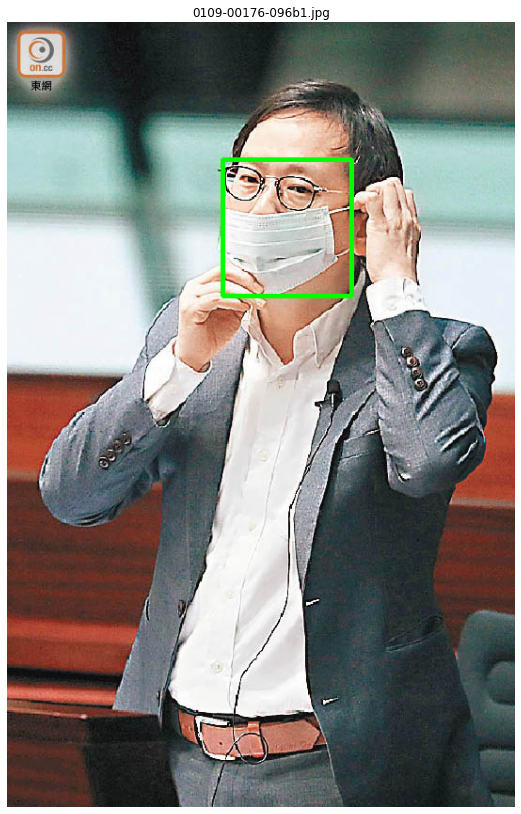

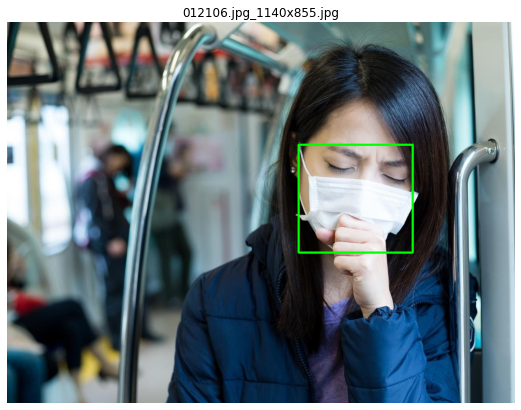

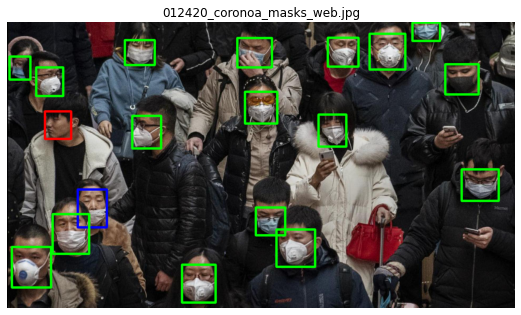

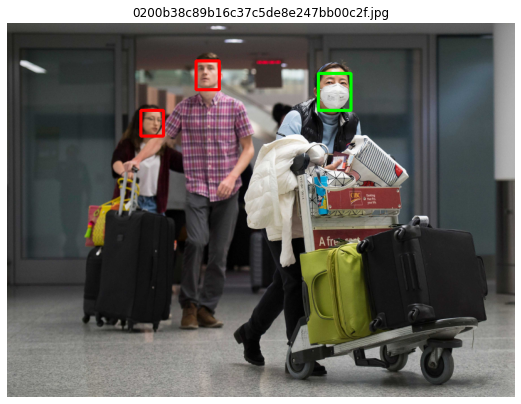

In [10]:
#PREVISUALIZATION OF BOUNDING BOXES IN IMAGES 
# GREEN --> MASK
# RED --> NO MASK
# BLUE --> MASK NOT PROPERLY WEARED

N = 5
for i in range(N):
    visualize_image(img_names[i+10])

### Cropping images

In [30]:
def images_cropping(img_name):
    
    img_path, lbl_path = getting_path(img_name)
    
    # we do the same operation of the previous function. Read and convert color.
    image = cv2.imread(img_path)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # get the labels and size info of the images
    labels, size = parse_xml(lbl_path)
    
    # creating a list with croped image labels
    cropedImgLabels = []

    for label in labels:
        name, bndbox = label
        
        # we only want the interior part of the boundbox
        croped_img = image[bndbox[0][1]:bndbox[1][1], bndbox[0][0]:bndbox[1][0]]
        
        label_num = 0
        
        if name == "good": # ASSIGN 0 TO GOOD CROPPING
            label_num = 0
        elif name == "bad": # 1 TO BAD CROPPING
            label_num = 1
        else:
            label_num = 2
        
        cropedImgLabel = [croped_img, label_num]
        
        cropedImgLabels.append(cropedImgLabel)
        
    return cropedImgLabels  

Now we make a label counter to see how many images we have with good or bad boundboxes. Label 0 for good wearing masks and label 1 for bad wearing masks.

But first of all we have to create directories to classificate our labels.

## Directories creation and cropping faces

In [35]:
dir_name = 'train_data/'

label_0_dir = dir_name + "0/"
label_1_dir = dir_name + "1/"

models_dir = "models/"

directory_creation(dir_name)
directory_creation(label_0_dir)
directory_creation(label_1_dir)
directory_creation(models_dir)

Directory models/ already exists.


In [37]:
label_0_counter = 0 # GOOD
label_1_counter = 0 # BAD

for img_name in img_names:
    cropedImgLabels = images_cropping(img_name)
    
    for cropedImgLabel in cropedImgLabels:
        
        label = cropedImgLabel[1]
        img = cropedImgLabel[0]
        
        if label == 0:
            croped_img_name = str(label_0_counter) + ".jpg"
            cv2.imwrite(label_0_dir + croped_img_name, img)
            label_0_counter += 1
            
        elif label == 1:
            croped_img_name = str(label_1_counter) + ".jpg"
            cv2.imwrite(label_1_dir + croped_img_name, img)
            label_1_counter += 1

In [38]:
label_0_images = [f for f in listdir(label_0_dir) if isfile(join(label_0_dir, f))]
label_1_images = [f for f in listdir(label_1_dir) if isfile(join(label_1_dir, f))]

In [42]:
print("TOTAL OF IMAGES: " + str(len(label_0_images) + len(label_1_images)))
print("Number of images good LABELED -0-: " + str(len(label_0_images)))
print("Number of images bad LABELED -1-: " + str(len(label_1_images)))

TOTAL OF IMAGES: 3788
Number of images good LABELED -0-: 3121
Number of images bad LABELED -1-: 667
